<a href="https://colab.research.google.com/github/Mirai-Kuma/DSProject/blob/master/Tourism_REAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# นำเข้าข้อมูลและแสดง Dataframe

### import และ อ่านไฟล์

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import folium
import geopandas as gpd
import warnings
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from matplotlib import colors as mcolors
from matplotlib.patheffects import withStroke
from matplotlib.patches import Rectangle

warnings.filterwarnings("ignore")

In [3]:
tour = pd.read_csv('tourism_dataset.csv')

### แสดง dataframe

In [4]:
tour.head()

,Location,Country,Category,Visitors,Rating,Revenue,Accommodation_Available
0,kuBZRkVsAR,India,Nature,948853,1.32,84388.38,Yes
1,aHKUXhjzTo,USA,Historical,813627,2.01,802625.60,No
2,dlrdYtJFTA,Brazil,Nature,508673,1.42,338777.11,Yes
3,DxmlzdGkHK,Brazil,Historical,623329,1.09,295183.60,Yes
4,WJCCQlepnz,France,Cultural,124867,1.43,547893.24,No


### แสดง info ของ dataframe

In [5]:
tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5989 entries, 0 to 5988
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Location                 5989 non-null   object 
 1   Country                  5989 non-null   object 
 2   Category                 5989 non-null   object 
 3   Visitors                 5989 non-null   int64  
 4   Rating                   5989 non-null   float64
 5   Revenue                  5989 non-null   float64
 6   Accommodation_Available  5989 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 327.6+ KB


# Data Cleansing

### Clean data โดยการเพิ่ม attribute ID และเปลี่ยนชื่อประเทศให้อยู่ใน format เดียวกัน

In [6]:
tour = tour.reset_index().rename(columns = {'index':'ID'})
tour['Country'] = tour['Country'].replace('USA', 'United States of America')
tour.head()

,ID,Location,Country,Category,Visitors,Rating,Revenue,Accommodation_Available
0,0,kuBZRkVsAR,India,Nature,948853,1.32,84388.38,Yes
1,1,aHKUXhjzTo,United States of America,Historical,813627,2.01,802625.60,No
2,2,dlrdYtJFTA,Brazil,Nature,508673,1.42,338777.11,Yes
3,3,DxmlzdGkHK,Brazil,Historical,623329,1.09,295183.60,Yes
4,4,WJCCQlepnz,France,Cultural,124867,1.43,547893.24,No


### การเพิ่ม feature ที่น่าสนใจ

เพิ่ม feature Satisfaction เพื่อให้ความหมายกับช่วงของ Rating เช่น ตังแต่ 4.0 ถึง 5.0 หมายถึง ดีมาก

In [7]:
def helper(x):
  if x >= 1 and x < 2:
    return 'Poor'
  elif x >= 2 and x < 3:
    return 'Fair'
  elif x >= 3 and x < 4:
    return 'Good'
  else:
    return 'Excellent'

tour['Satisfaction'] = tour['Rating'].apply(helper)

เพิ่ม feature Revenue per Visitor เพื่อดูสัดของค่าใช้จ่ายที่ได้รับโดยเฉลี่ยต่อผู้เข้าชม 1 คน

In [8]:
tour['Revenue_per_Visitor'] = tour['Revenue'] / tour['Visitors']

จัดเรียงตำแหน่งคอลัมน์ใหม่ให้คอลัมน์ที่มีความเกี่ยวข้องกันอยู่ใกล้เคียงกัน

In [9]:
new_order = ['ID', 'Location', 'Country', 'Category', 'Revenue', 'Visitors', 'Revenue_per_Visitor', 'Rating', 'Satisfaction', 'Accommodation_Available']
tour = tour[new_order]
tour

,ID,Location,Country,Category,Revenue,Visitors,Revenue_per_Visitor,Rating,Satisfaction,Accommodation_Available
0,0,kuBZRkVsAR,India,Nature,84388.38,948853,0.088937,1.32,Poor,Yes
1,1,aHKUXhjzTo,United States of America,Historical,802625.60,813627,0.986479,2.01,Fair,No
2,2,dlrdYtJFTA,Brazil,Nature,338777.11,508673,0.666002,1.42,Poor,Yes
3,3,DxmlzdGkHK,Brazil,Historical,295183.60,623329,0.473560,1.09,Poor,Yes
4,4,WJCCQlepnz,France,Cultural,547893.24,124867,4.387815,1.43,Poor,No
...,...,...,...,...,...,...,...,...,...,...
5984,5984,xAzwnVKAqz,United States of America,Urban,132848.78,828137,0.160419,1.97,Poor,No
5985,5985,IfKotyaJFC,France,Nature,325183.96,276317,1.176851,3.53,Good,Yes
5986,5986,bPyubCWGgA,Egypt,Beach,927336.50,809198,1.145995,3.37,Good,No
5987,5987,kkWIucpBnu,Egypt,Cultural,115791.43,808303,0.143253,2.52,Fair,Yes


### ตรวจสอบและจัดการกับค่าผิดปกติสำหรับ feature ที่เป็นข้อมูลเชิงปริมาณ

เมื่อตรวจสอบพบว่า feature Revenue per Visitor มีค่าที่ผิดปกติ

In [10]:
Visitors_z_scores = stats.zscore(tour['Visitors'])
Revenue_z_scores = stats.zscore(tour['Revenue'])
Rating_z_scores = stats.zscore(tour['Rating'])
Revenue_per_Visitor_z_scores = stats.zscore(tour['Revenue_per_Visitor'])
print('Visitors outlier:', tour[(Visitors_z_scores < -3) | (Visitors_z_scores > 3)]['ID'].count())
print('Revenue outlier:', tour[(Revenue_z_scores < -3) | (Revenue_z_scores > 3)]['ID'].count())
print('Rating outlier:', tour[(Rating_z_scores < -3) | (Rating_z_scores > 3)]['ID'].count())
print('Revenue_per_Visitor outlier:', tour[(Revenue_per_Visitor_z_scores < -3) | (Revenue_per_Visitor_z_scores > 3)]['ID'].count())

Visitors outlier: 0
Revenue outlier: 0
Rating outlier: 0
Revenue_per_Visitor outlier: 53


เมื่อตรวจสอบค่าสัมประสิทธิ์ความเบ้ของการแจกแจงของข้อมูล Revenue per Visitor แล้วพบว่าข้อมูลมีการแจกแจงแบบเบ้ขวา จึงได้ใช้ค่ามัธยฐานเป็นตัวแทนของค่ากลาง และใช้ค่ากลางแทนที่ข้อมูลที่เป็นค่าผิดปกติแล้วเก็บไว้ในคอลัมน์ Revenue per Visitor without outlier

In [11]:
print('Skewness:', tour['Revenue_per_Visitor'].skew())

Q1 = tour['Revenue_per_Visitor'].quantile(0.25)
Q3 = tour['Revenue_per_Visitor'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

tour['Revenue_per_Visitor_without_outlier'] = tour['Revenue_per_Visitor'].apply(lambda x: x if (x > lower_bound and x < upper_bound) else tour['Revenue_per_Visitor'].median())
tour

Skewness: 20.64016705562611


,ID,Location,Country,Category,Revenue,Visitors,Revenue_per_Visitor,Rating,Satisfaction,Accommodation_Available,Revenue_per_Visitor_without_outlier
0,0,kuBZRkVsAR,India,Nature,84388.38,948853,0.088937,1.32,Poor,Yes,0.088937
1,1,aHKUXhjzTo,United States of America,Historical,802625.60,813627,0.986479,2.01,Fair,No,0.986479
2,2,dlrdYtJFTA,Brazil,Nature,338777.11,508673,0.666002,1.42,Poor,Yes,0.666002
3,3,DxmlzdGkHK,Brazil,Historical,295183.60,623329,0.473560,1.09,Poor,Yes,0.473560
4,4,WJCCQlepnz,France,Cultural,547893.24,124867,4.387815,1.43,Poor,No,1.005356
...,...,...,...,...,...,...,...,...,...,...,...
5984,5984,xAzwnVKAqz,United States of America,Urban,132848.78,828137,0.160419,1.97,Poor,No,0.160419
5985,5985,IfKotyaJFC,France,Nature,325183.96,276317,1.176851,3.53,Good,Yes,1.176851
5986,5986,bPyubCWGgA,Egypt,Beach,927336.50,809198,1.145995,3.37,Good,No,1.145995
5987,5987,kkWIucpBnu,Egypt,Cultural,115791.43,808303,0.143253,2.52,Fair,Yes,0.143253


# ค่าสถิติเบื้องต้นและการกระจายตัวของข้อมูล

## ค่าทางสถิติเบื้องต้นของแต่ละ feature

ค่าสถิติเบื้องต้นของ feature ที่เป็นข้อมูลเชิงปริมาณ

In [12]:
tour.describe().drop(columns=['ID'])

,Revenue,Visitors,Revenue_per_Visitor,Rating,Revenue_per_Visitor_without_outlier
count,5989.000000,5989.000000,5989.000000,5989.000000,5989.000000
mean,499479.367253,501016.089497,3.624295,3.009347,1.092861
std,286743.225211,289783.294978,18.763034,1.155980,0.842977
min,1025.810000,1108.000000,0.001350,1.000000,0.001350
25%,251410.450000,252789.000000,0.502985,2.010000,0.502985
50%,494169.350000,500831.000000,1.005356,3.000000,1.005356
75%,742241.240000,751371.000000,2.000396,4.010000,1.356481
max,999999.490000,999982.000000,784.127343,5.000000,4.243039


ค่าสถิติเบื้องต้นของ feature ที่เป็นข้อมูลเชิงคุณภาพ

In [13]:
tour.describe(include='object').drop(columns=['Location'])

,Country,Category,Satisfaction,Accommodation_Available
count,5989,5989,5989,5989
unique,7,6,4,2
top,Egypt,Adventure,Fair,Yes
freq,912,1037,1512,3013


## ค่าเฉลี่ยต่างๆ

เปรียบเทียบค่าเฉลี่ยของ feature ต่างๆแบ่งตามประเทศ

In [14]:
mean_df = pd.DataFrame(tour.groupby('Country')['Visitors'].mean().sort_values(ascending=False))
mean_df = mean_df.join(tour.groupby('Country')['Revenue'].mean().sort_values(ascending=False))
mean_df = mean_df.join(tour.groupby('Country')['Rating'].mean().sort_values(ascending=False))
mean_df = mean_df.join(tour.groupby('Country')['Revenue_per_Visitor'].mean().sort_values(ascending=False))
mean_df.columns = ['Visitors', 'Revenue', 'Rating', 'Revenue_per_Visitor']
print('Max Visitors by Country:', mean_df['Visitors'].idxmax(), '-', mean_df['Visitors'].max())
print('Min Visitors by Country:', mean_df['Visitors'].idxmin(), '-', mean_df['Visitors'].min())
print('Max Revenue by Country:', mean_df['Revenue'].idxmax(), '-', mean_df['Revenue'].max())
print('Min Revenue by Country:', mean_df['Revenue'].idxmin(), '-', mean_df['Revenue'].min())
print('Max Rating by Country:', mean_df['Rating'].idxmax(), '-', mean_df['Rating'].max())
print('Min Rating by Country:', mean_df['Rating'].idxmin(), '-', mean_df['Rating'].min())
print('Max Revenue per Visitor by Country:', mean_df['Revenue_per_Visitor'].idxmax(), '-', mean_df['Revenue_per_Visitor'].max())
print('Min Revenue per Visitor by Country:', mean_df['Revenue_per_Visitor'].idxmin(), '-', mean_df['Revenue_per_Visitor'].min())
mean_df

Max Visitors by Country: United States of America - 508495.50353773584
Min Visitors by Country: Brazil - 493206.56904761906
Max Revenue by Country: Brazil - 508075.23841666663
Min Revenue by Country: France - 479027.5872462077
Max Rating by Country: Brazil - 3.0741666666666667
Min Rating by Country: China - 2.958647642679901
Max Revenue per Visitor by Country: China - 4.845314868993517
Min Revenue per Visitor by Country: France - 2.539499416052928


,Visitors,Revenue,Rating,Revenue_per_Visitor
Country,,,,
United States of America,508495.503538,504369.440507,2.984304,3.645416
India,503440.853795,507451.226953,2.973158,2.891662
Egypt,502821.986842,505038.149704,3.024298,3.311338
China,501796.987593,494332.975496,2.958648,4.845315
Australia,501250.608434,497184.737663,3.019602,3.900140
France,495851.366394,479027.587246,3.030268,2.539499
Brazil,493206.569048,508075.238417,3.074167,4.386822


กราฟเปรียบเทียบค่าเฉลี่ยของ Revenue, Visitors, Rating และ Revenue per Visitor โดยแบ่งตามแต่ละประเภทของสถานที่ท่องเที่ยวและตามประเทศที่ตั้ง

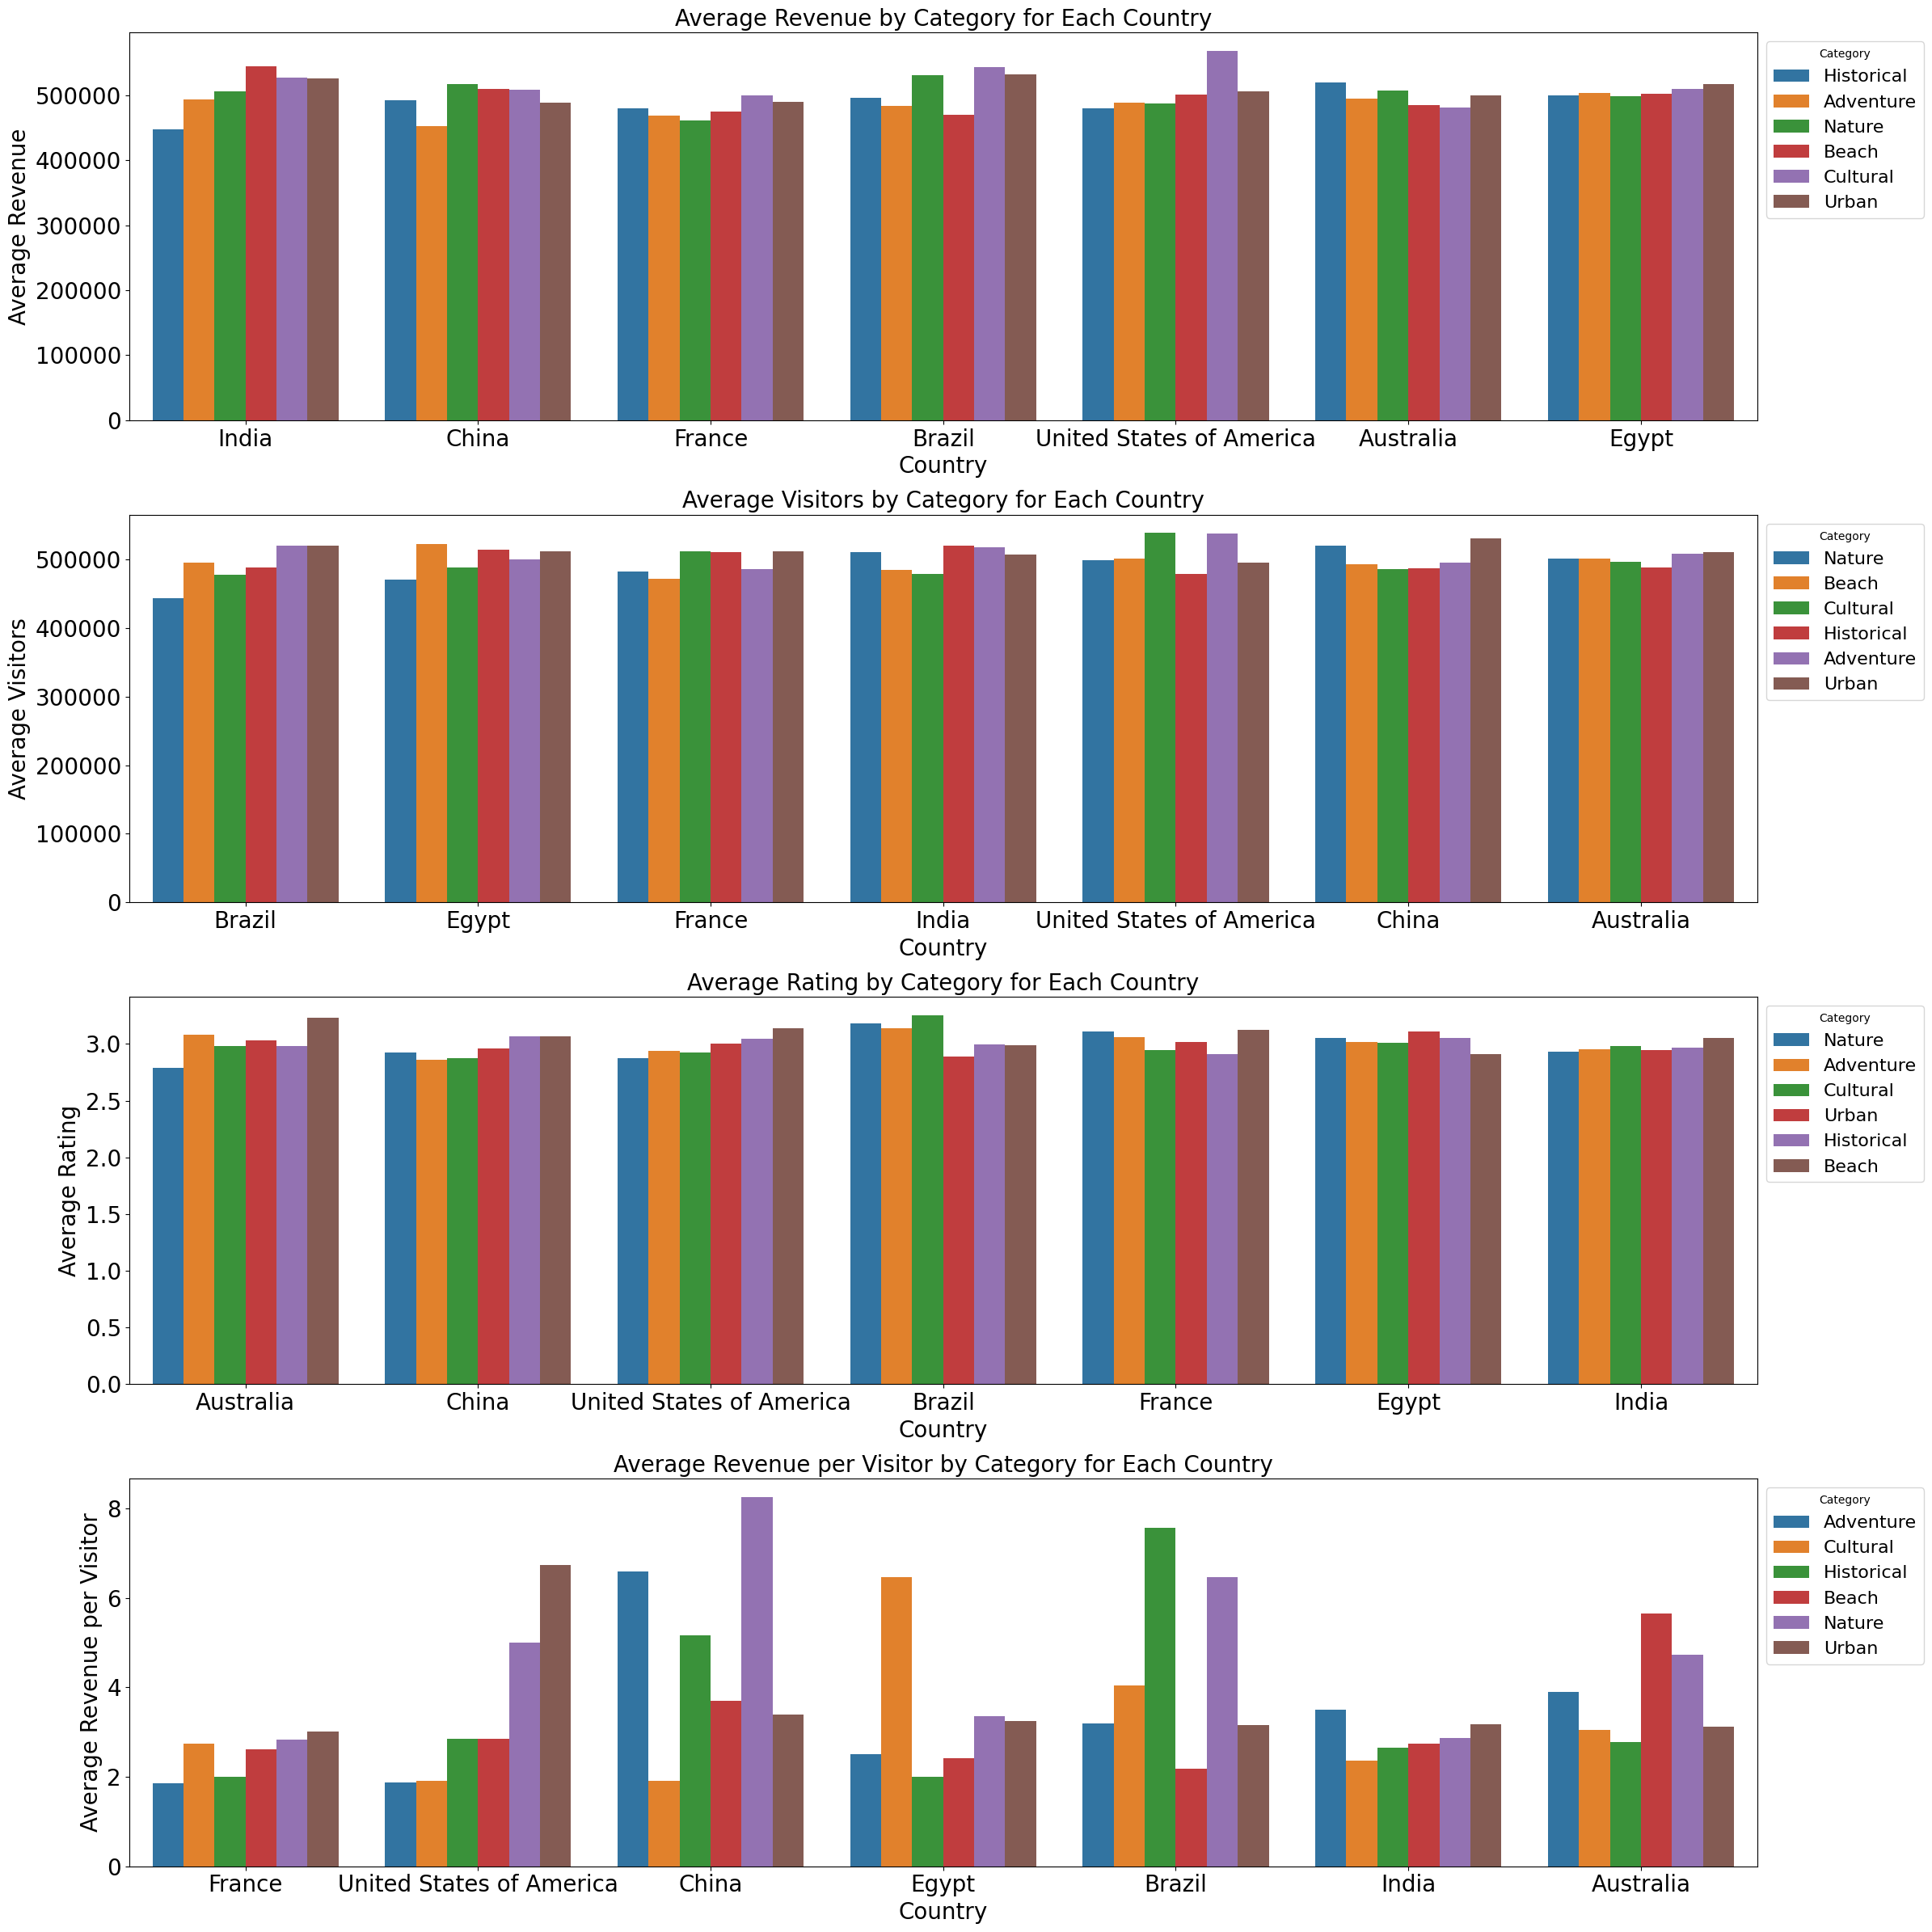

In [15]:
avg_revenue = tour.groupby(['Country', 'Category'])['Revenue'].mean().sort_values().reset_index()
avg_visitors = tour.groupby(['Country', 'Category'])['Visitors'].mean().sort_values().reset_index()
avg_rating = tour.groupby(['Country', 'Category'])['Rating'].mean().sort_values().reset_index()
avg_revenue_per_visitor = tour.groupby(['Country', 'Category'])['Revenue_per_Visitor'].mean().sort_values().reset_index()

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(24, 24))

# กราฟ Revenue
sns.barplot(data=avg_revenue, ax=ax[0], x='Country', y='Revenue', hue='Category')
ax[0].set_title('Average Revenue by Category for Each Country', fontsize=20)
ax[0].set_xlabel('Country', fontsize=20)
ax[0].set_ylabel('Average Revenue', fontsize=20)
ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(title='Category', loc='upper left',bbox_to_anchor=(1 , 1) , fontsize=16)

# กราฟ Visitors
sns.barplot(data=avg_visitors, ax=ax[1], x='Country', y='Visitors', hue='Category')
ax[1].set_title('Average Visitors by Category for Each Country', fontsize=20)
ax[1].set_xlabel('Country', fontsize=20)
ax[1].set_ylabel('Average Visitors', fontsize=20)
ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(title='Category', loc='upper left',bbox_to_anchor=(1 , 1) , fontsize=16)

# กราฟ Rating
sns.barplot(data=avg_rating, ax=ax[2], x='Country', y='Rating', hue='Category')
ax[2].set_title('Average Rating by Category for Each Country', fontsize=20)
ax[2].set_xlabel('Country', fontsize=20)
ax[2].set_ylabel('Average Rating', fontsize=20)
ax[2].tick_params(axis='both', labelsize=20)
ax[2].legend(title='Category', loc='upper left',bbox_to_anchor=(1 , 1) , fontsize=16)

# กราฟ Revenue per Visitor
sns.barplot(data=avg_revenue_per_visitor, ax=ax[3], x='Country', y='Revenue_per_Visitor', hue='Category')
ax[3].set_title('Average Revenue per Visitor by Category for Each Country', fontsize=20)
ax[3].set_xlabel('Country', fontsize=20)
ax[3].set_ylabel('Average Revenue per Visitor', fontsize=20)
ax[3].tick_params(axis='both', labelsize=20)
ax[3].legend(title='Category', loc='upper left',bbox_to_anchor=(1 , 1) , fontsize=16)

plt.tight_layout()
plt.show()

## การแสดงความถี่และความหนาแน่น

กราฟแสดงความหนาแน่นและแผนภาพกล่องของข้อมูล Visitors, Revenue, Rating และ Revenue per Visitor ทำให้เห็นว่า Visitors, Revenue, Rating มีการแจกแจงแบบปกติ และ Revenue per Visitor มีการแจกแจงแบบเบ้ขวา

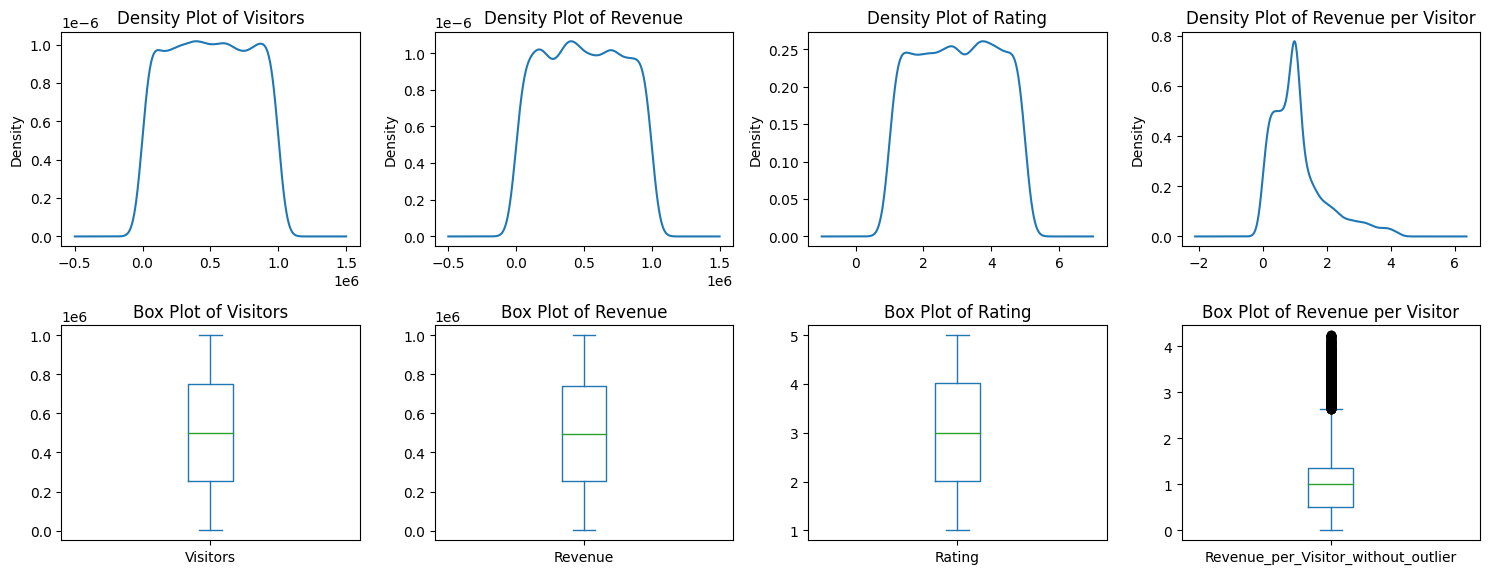

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))
tour['Visitors'].plot(ax=ax[0, 0], kind='density')
tour['Revenue'].plot(ax=ax[0, 1], kind='density')
tour['Rating'].plot(ax=ax[0, 2], kind='density')
tour['Revenue_per_Visitor_without_outlier'].plot(ax=ax[0, 3], kind='density')
tour['Visitors'].plot(ax=ax[1, 0], kind='box')
tour['Revenue'].plot(ax=ax[1, 1], kind='box')
tour['Rating'].plot(ax=ax[1, 2], kind='box')
tour['Revenue_per_Visitor_without_outlier'].plot(ax=ax[1, 3], kind='box')
ax[0, 0].set_title('Density Plot of Visitors')
ax[0, 1].set_title('Density Plot of Revenue')
ax[0, 2].set_title('Density Plot of Rating')
ax[0, 3].set_title('Density Plot of Revenue per Visitor')
ax[1, 0].set_title('Box Plot of Visitors')
ax[1, 1].set_title('Box Plot of Revenue')
ax[1, 2].set_title('Box Plot of Rating')
ax[1, 3].set_title('Box Plot of Revenue per Visitor')
plt.tight_layout()
plt.show()

แผนภูมิแสดงความถี่ของสถานที่ท่องเที่ยวแบ่งตามแต่ละประเภทของสถานที่ท่องเที่ยวและตามประเทศที่ตั้ง

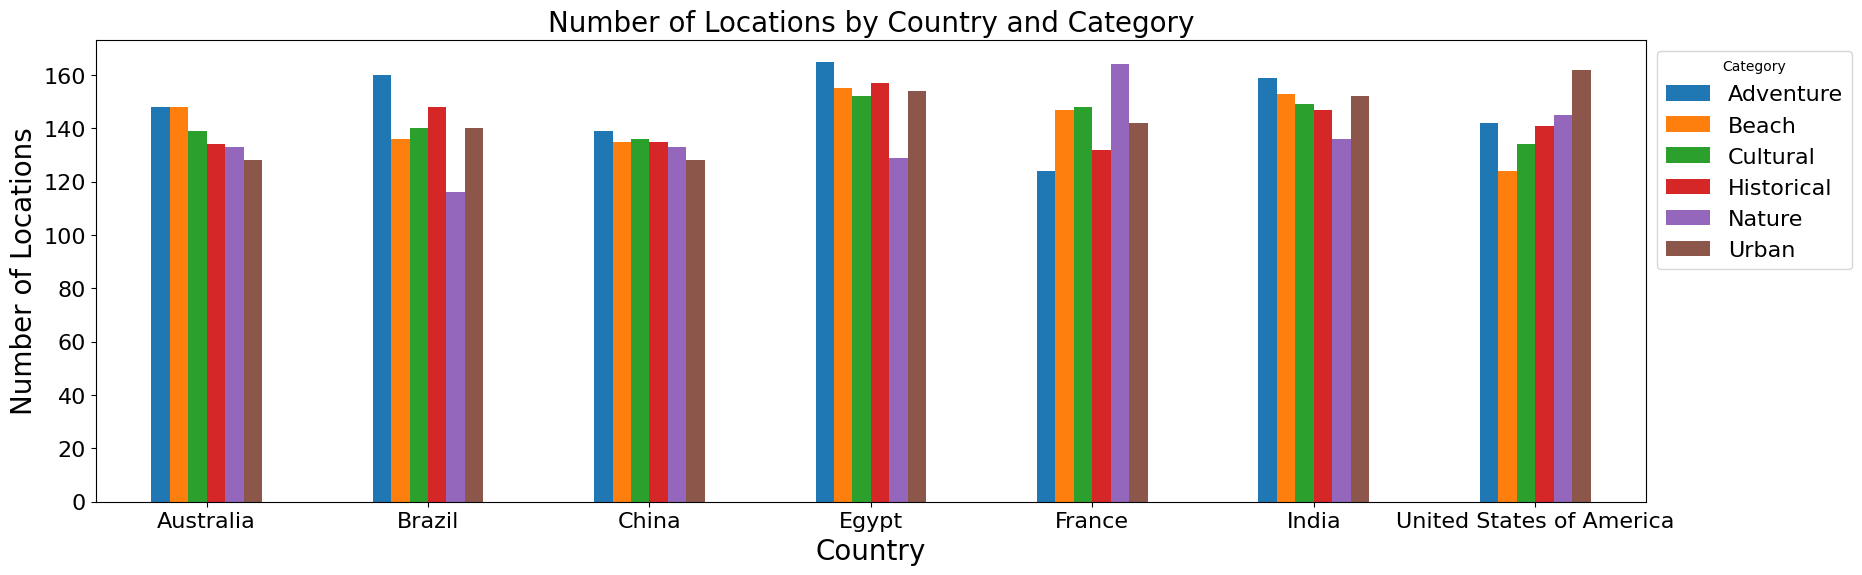

In [17]:
tour.groupby(['Country', 'Category'])['Location'].count().unstack().plot(kind='bar', figsize=(20, 6))
plt.xlabel('Country', fontsize=20)
plt.ylabel('Number of Locations', fontsize=20)
plt.title('Number of Locations by Country and Category', fontsize=20)
plt.legend(title='Category', loc='upper left',bbox_to_anchor=(1 , 1) , fontsize=16)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

แผนภูมิแสดงความถี่ของสถานที่ท่องเที่ยวแบ่งตามสถานะการมีที่พักแรม ตามแต่ละประเภทของสถานที่ท่องเที่ยวและตามประเทศที่ตั้ง

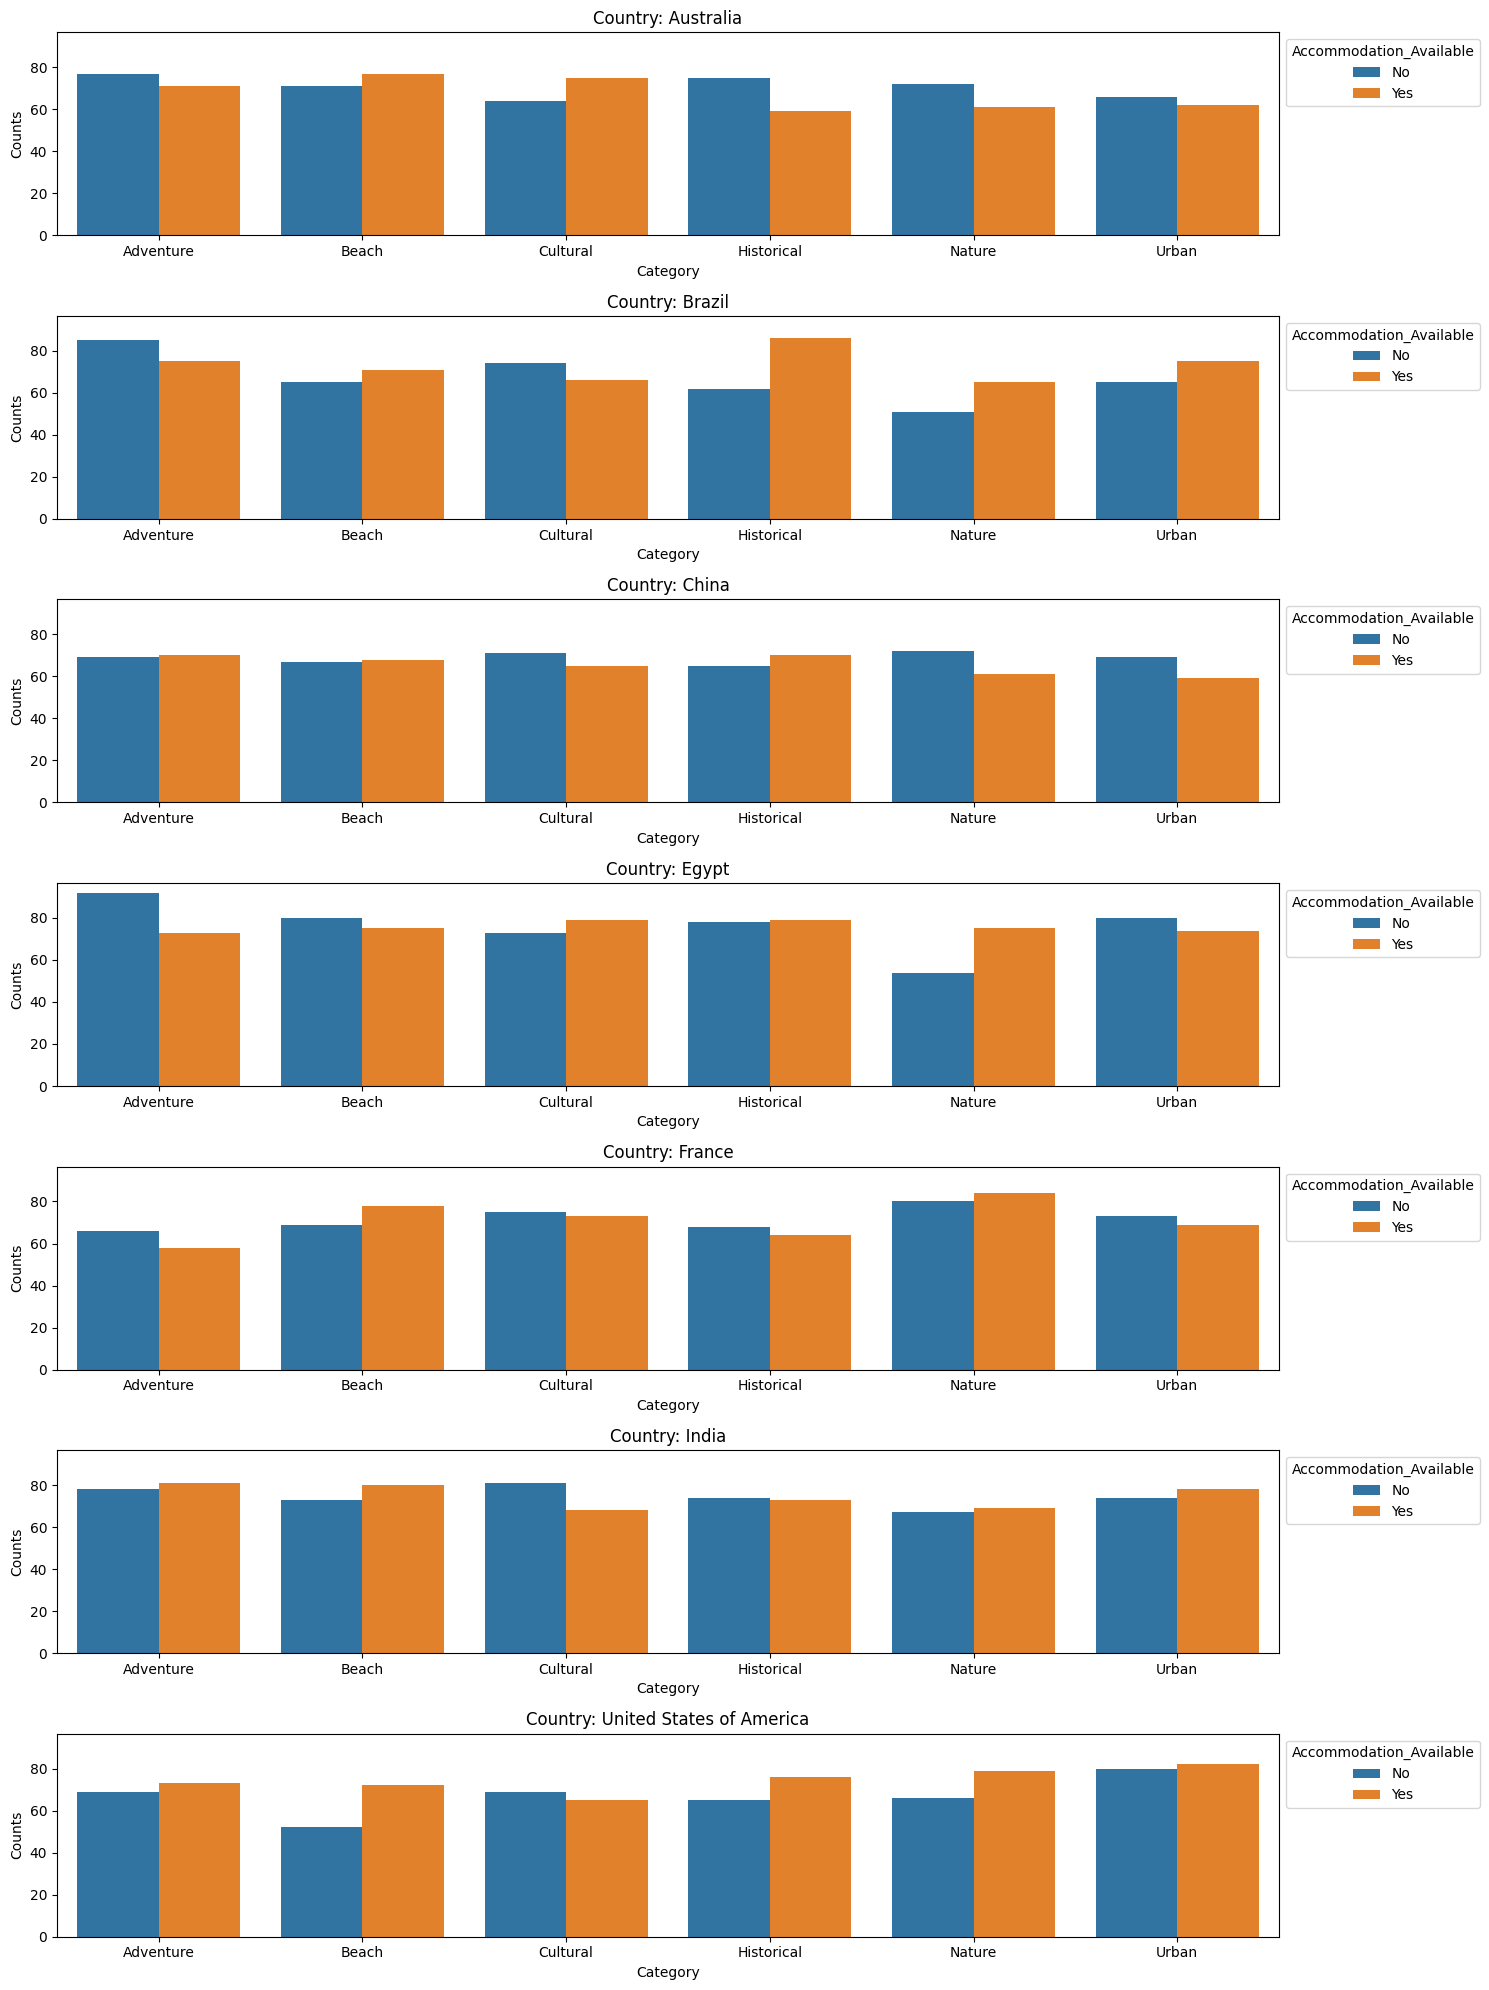

In [18]:
data = tour.groupby(['Country', 'Category', 'Accommodation_Available']).size().reset_index(name='Counts')

# Get the list of unique categories to loop through
categories = data['Country'].unique()

# Create subplots: 1 row and as many columns as there are unique categories
fig, axes = plt.subplots(ncols=1, nrows=len(categories), figsize=(15, 20), sharey=True)

# Plot each category in a separate subplot
for i, category in enumerate(categories):
    # Filter the data for the specific category
    category_data = data[data['Country'] == category]

    # Plot on the respective axis
    sns.barplot(data=category_data, x='Category', y='Counts', hue='Accommodation_Available', ax=axes[i])

    # Set title and labels for each subplot
    axes[i].set_title(f'Country: {category}')
    axes[i].set_xlabel("Category")
    axes[i].set_ylabel("Counts")
    axes[i].legend(title='Accommodation_Available', loc='upper left',bbox_to_anchor=(1 , 1))

# Adjust the layout to fit the plots
plt.tight_layout()
plt.show()

แผนภูมิแสดงความถี่ของสถานที่ท่องเที่ยวแบ่งตามระดับความพึงพอใจ ตามแต่ละประเภทของสถานที่ท่องเที่ยวและตามประเทศที่ตั้ง

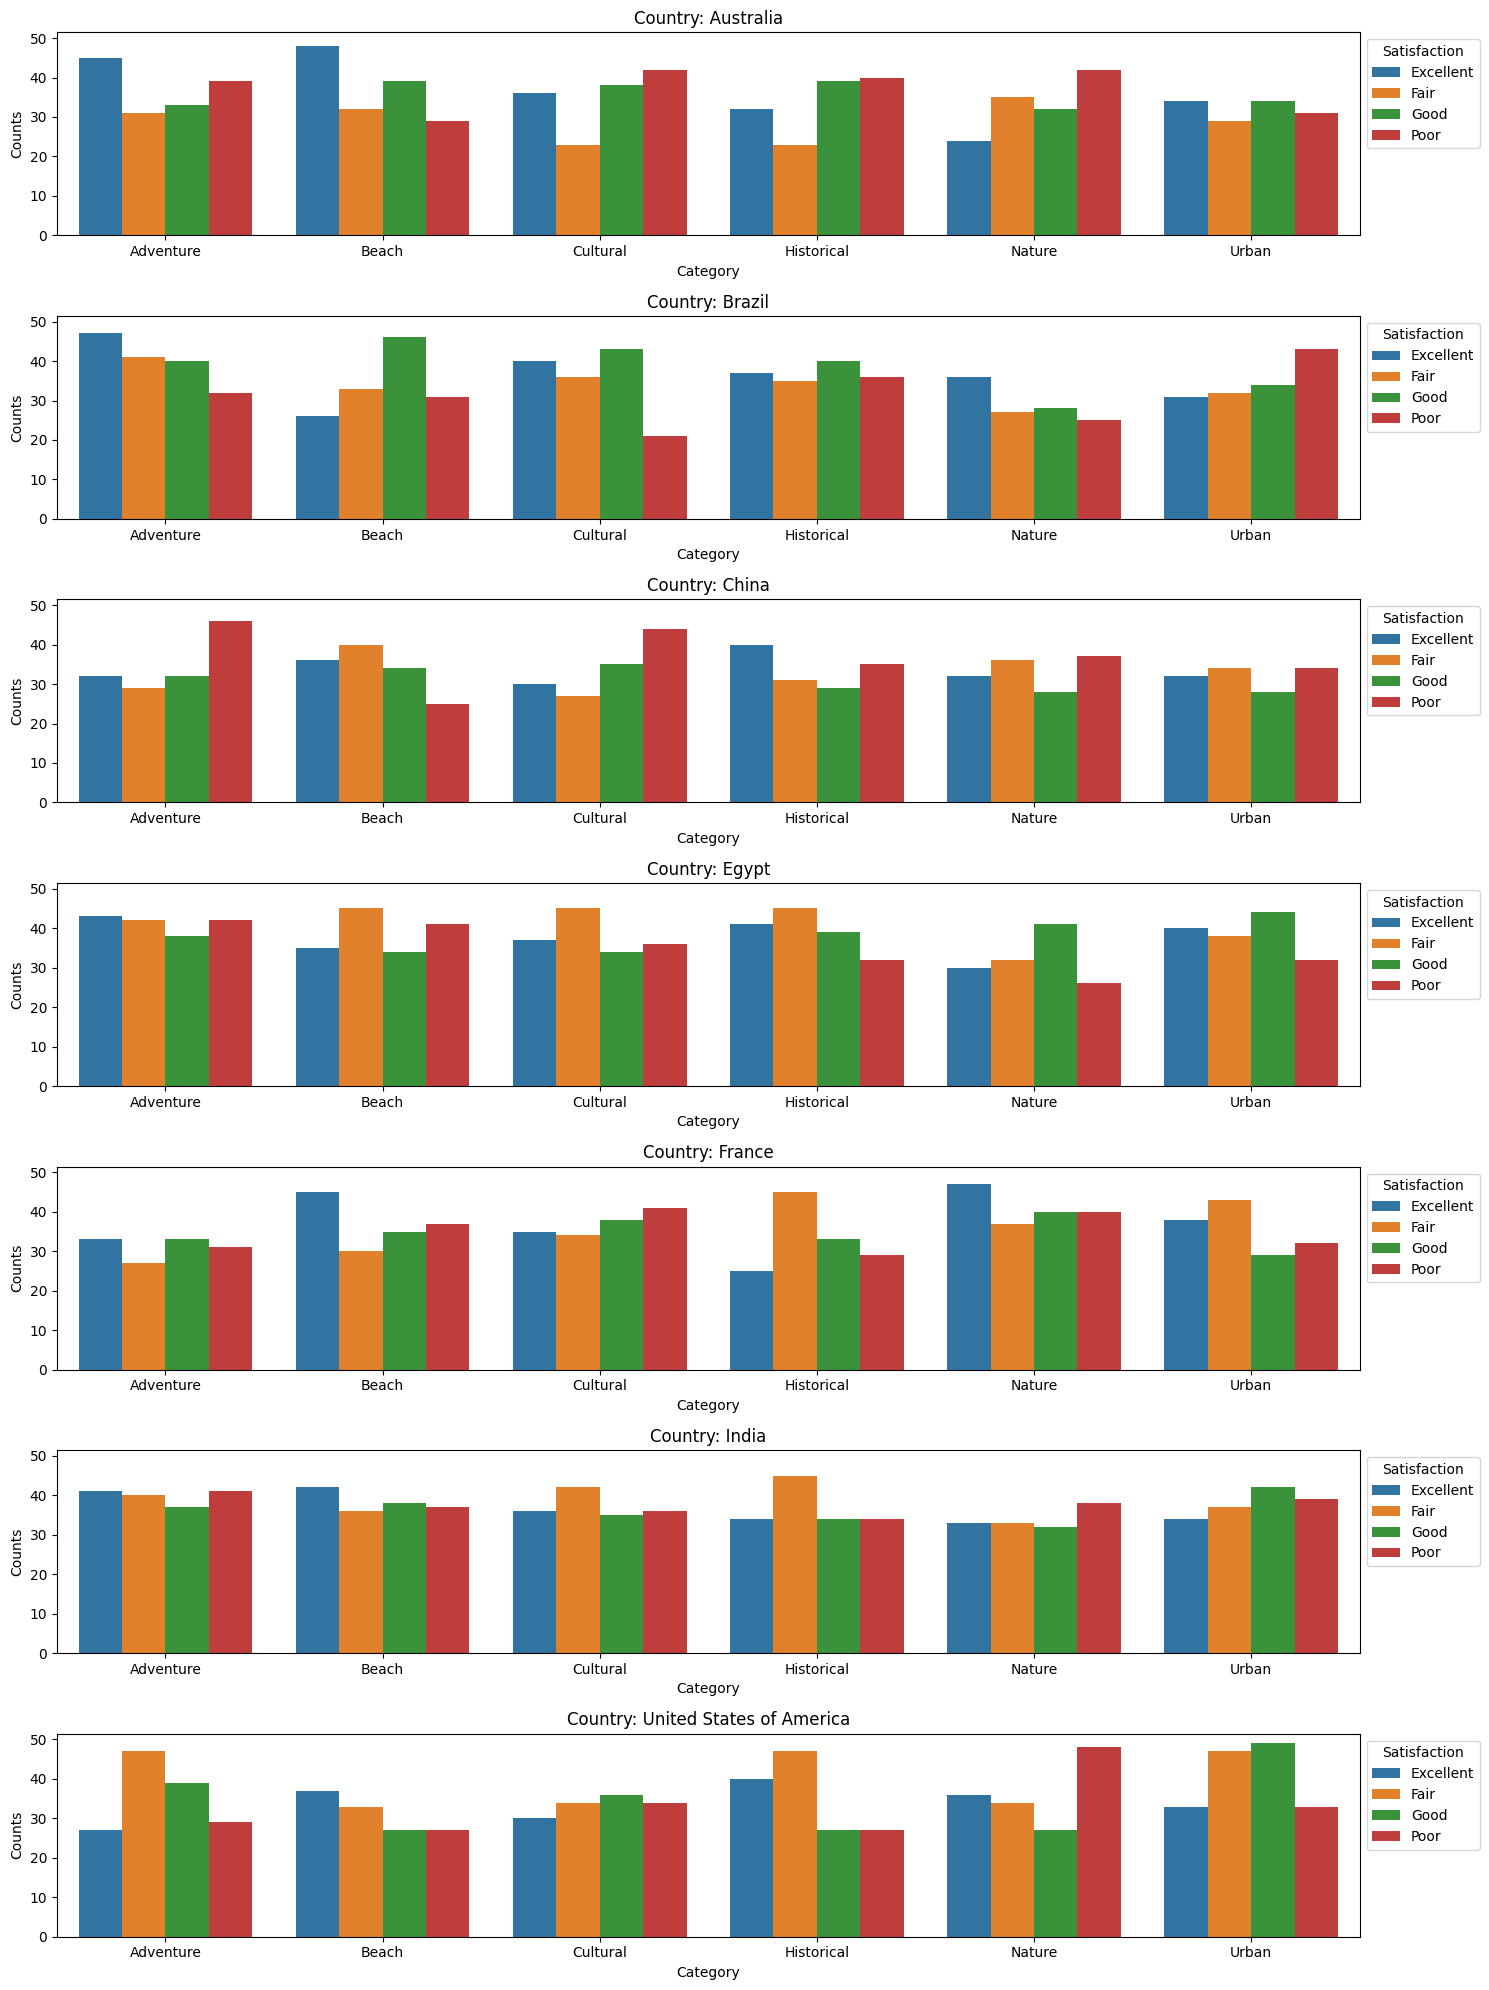

In [19]:
data = tour.groupby(['Country', 'Category', 'Satisfaction']).size().reset_index(name='Counts')

# Get the list of unique categories to loop through
categories = data['Country'].unique()

# Create subplots: 1 row and as many columns as there are unique categories
fig, axes = plt.subplots(ncols=1, nrows=len(categories), figsize=(15, 20), sharey=True)

# Plot each category in a separate subplot
for i, category in enumerate(categories):
    # Filter the data for the specific category
    category_data = data[data['Country'] == category]

    # Plot on the respective axis
    sns.barplot(data=category_data, x='Category', y='Counts', hue='Satisfaction', ax=axes[i])

    # Set title and labels for each subplot
    axes[i].set_title(f'Country: {category}')
    axes[i].set_xlabel("Category")
    axes[i].set_ylabel("Counts")
    axes[i].legend(title='Satisfaction', loc='upper left',bbox_to_anchor=(1 , 1))

# Adjust the layout to fit the plots
plt.tight_layout()
plt.show()

# การทดสอบทางสถิติและหาความสัมพันธ์ระหว่าง feature

### การหาความสัมพันธ์ระหว่าง Feature

หาความสัมพันธ์ระหว่าง feature ตัวแปรเชิงปริมาณ พบว่ามีความสัมพันธ์ระหว่าง Revenue กับ Revenue per Visitor และ Visitors กับ Revenue per Visitor

In [20]:
tour[['Rating', 'Revenue', 'Visitors', 'Revenue_per_Visitor_without_outlier']].corr()

,Rating,Revenue,Visitors,Revenue_per_Visitor_without_outlier
Rating,1.000000,0.000574,-0.010337,-0.007419
Revenue,0.000574,1.000000,0.008358,0.507102
Visitors,-0.010337,0.008358,1.000000,-0.475047
Revenue_per_Visitor_without_outlier,-0.007419,0.507102,-0.475047,1.000000


แผนภาพแสดงความสัมพันธ์และแนวโน้มของข้อมูลระหว่าง Revenue กับ Revenue per Visitor และ Visitors กับ Revenue per Visitor แสดงให้เห็นว่า Revenue กับ Revenue per Visitor มีความสัมพันธ์แบบแปรผันตรง และ Visitors กับ Revenue per Visitor มีความสัมพันธ์แบบแปรผกผันกัน

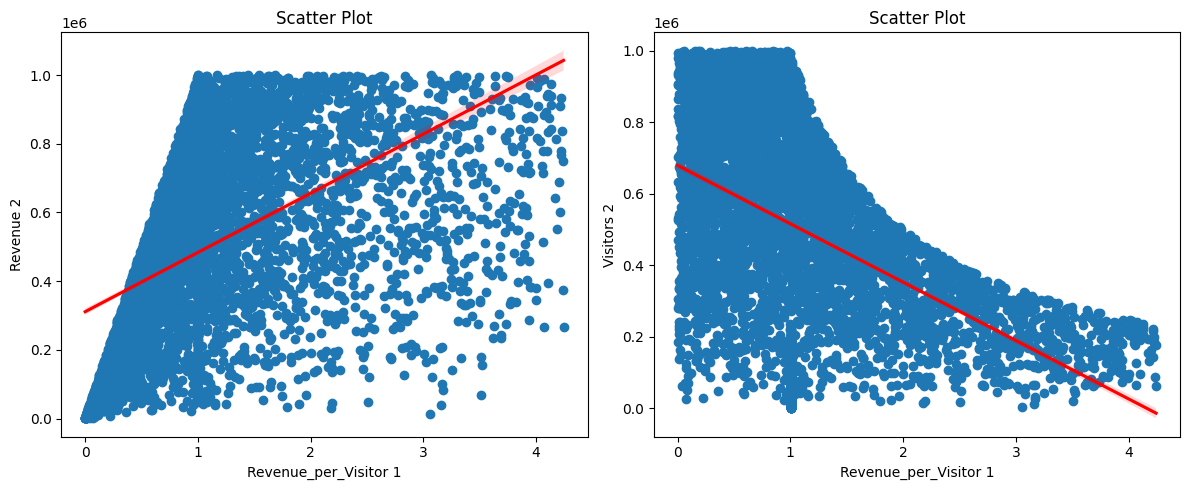

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax[0].scatter(tour['Revenue_per_Visitor_without_outlier'], tour['Revenue'])
sns.regplot(ax=ax[0], data=tour, x='Revenue_per_Visitor_without_outlier', y='Revenue', scatter=False, color='red')
ax[0].set_xlabel('Revenue_per_Visitor 1')
ax[0].set_ylabel('Revenue 2')
ax[0].set_title('Scatter Plot')
ax[1].scatter(tour['Revenue_per_Visitor_without_outlier'], tour['Visitors'])
sns.regplot(ax=ax[1], data=tour, x='Revenue_per_Visitor_without_outlier', y='Visitors', scatter=False, color='red')
ax[1].set_xlabel('Revenue_per_Visitor 1')
ax[1].set_ylabel('Visitors 2')
ax[1].set_title('Scatter Plot')
plt.tight_layout()
plt.show()

### การทดสอบทางสถิติ

In [22]:
g1 = tour[tour['Accommodation_Available'] =='Yes']['Visitors']
g2 = tour[tour['Accommodation_Available'] =='No']['Visitors']
s, p = stats.f_oneway(g1, g2)
print('p-value:', p)

p-value: 0.03320639916625398


                               sum_sq      df         F    PR(>F)
Accommodation_Available  3.807838e+11     1.0  4.537203  0.033206
Residual                 5.024577e+14  5987.0       NaN       NaN
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2   meandiff  p-adj    lower      upper    reject
-------------------------------------------------------------
    No    Yes -15947.7843 0.0332 -30624.948 -1270.6206   True
-------------------------------------------------------------


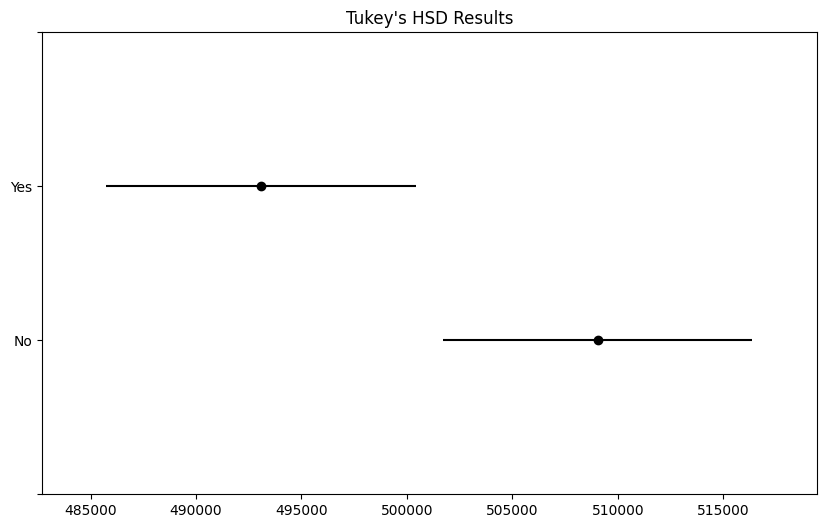

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# สร้างโมเดล ANOVA
model = ols('Visitors ~ Accommodation_Available', data=tour).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Tukey's HSD
tukey = pairwise_tukeyhsd(tour['Visitors'], tour['Accommodation_Available'])
print(tukey)

# Visualize Tukey's HSD results
tukey.plot_simultaneous()
plt.title("Tukey's HSD Results")
plt.show()